In [89]:
"""!pip install pandas numpy opencv-python matplotlib scikit-learn mediapipe json"""

'!pip install pandas numpy opencv-python matplotlib scikit-learn mediapipe json'

<h1> Tiền xử lí dữ liệu

In [5]:
# Tải các thư viện cần thiết
#!pip install pandas numpy opencv-python matplotlib scikit-learn

In [6]:
# Import thư viện
import os
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt
import mediapipe as mp
from sklearn.model_selection import train_test_split

# Định nghĩa đường dẫn dữ liệu
RAW_DATA_DIR = "../data/raw/"
PROCESSED_DATA_DIR = "../data/processed/"

In [7]:

def euclidean_distance(v1, v2):
    return np.sqrt((float(v1[0]) - float(v2[0])) ** 2 + (float(v1[1]) - float(v2[1])) ** 2)


# Trích xuất keyframes

## Khai báo các hàm 

<h3> Hàm đọc video từ đường dẫn 

In [ ]:
# Đọc video từ đường dẫn
def ReadVideo(video_path):    
    # Read the input video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise ValueError(f"Could not open video file {video_path}")
    return cap

<h3> Hàm chuyển tất cả khung hình sang xám

In [9]:
# Hàm chuyển tất cả khung hình lấy được sang khung hình xám
def getGrayFramesAndFrames(cap):
    frames = []
    gray_frames = []
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        frames.append(frame)        
        # Chuyển frame sang gray
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        gray_frames.append(gray_frame)
    
    # giải phóng đối tượng cap
    cap.release()
    return gray_frames, frames

<h3> Hàm tính độ khác biệt giữa mỗi 2 frame liên tiếp

In [10]:
def calculate_histogram_differences(gray_frames):
    HDiffs = []
    # Duyệt qua tất cả các frame trừ frame cuối vì thường là frame không có giá trị
    for i in range(0, len(gray_frames)-1):
        if (i == 0):
        #[gray_frames[i]]: grayframe thứ i, [0] kênh chứa độ sáng, None: tính toàn bộ ảnh, không dùng mask, [256]: 256 bins, 0 <=[0, 256]: giá trị pixel < 256
            hist_curr = cv2.calcHist([gray_frames[i]], [0], None, [256], [0, 256])
            continue
        # Gán frame ở vòng lặp trước cho hist_prev và tính lại hist_curr
        hist_prev = hist_curr
        hist_curr = cv2.calcHist([gray_frames[i]], [0], None, [256], [0, 256])

        Hdiff = np.sum(np.abs(hist_prev - hist_curr))
        HDiffs.append(Hdiff)
    return HDiffs

<h3> Hàm trích xuất keyframes

In [11]:
def Extract_key_frames(video_path):
    cap = ReadVideo(video_path)
    gray_frames, frames = getGrayFramesAndFrames(cap)
    HDiffs = calculate_histogram_differences(gray_frames)
    mean = np.mean(HDiffs)
    std = np.std(HDiffs)
    threshold = mean + std
    # Chọn keyframes dựa trên ngưỡng
    keyframes = []
    for i in range(len(HDiffs)):
        if HDiffs[i] > threshold:
            # Lấy frame i+1 vì Hdiffs[i] là độ khác biệt của frame thứ i +1 với thứ i
            keyframes.append(frames[i+1])
    return keyframes

## Kiểm thử

<h3> Thiết lập đường dẫn

In [12]:
#namevideo ="00668"
namevideo ="17960"
video_path = rf'D:\Study_space\Ki6\sign_language_recognition_project\data\raw\videos\{namevideo}.mp4' 

<h3> Chuyển tất cả frame sang gray

Video has 92 frames at 30.003261224046092 FPS


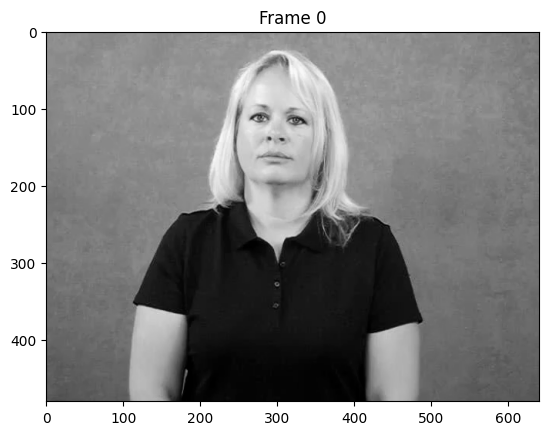

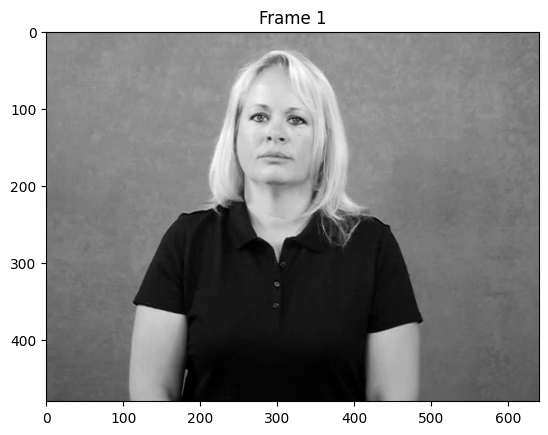

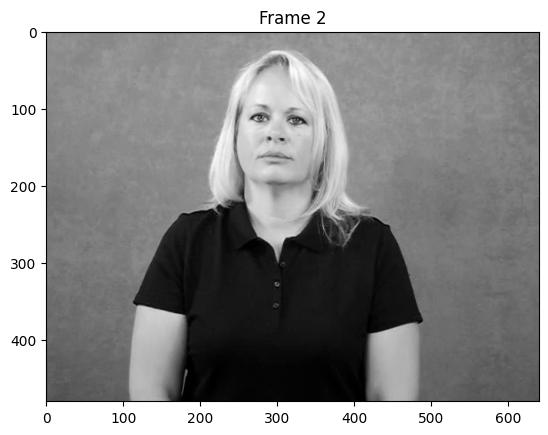

In [13]:
cap = ReadVideo(video_path)
gray_frames, frames = getGrayFramesAndFrames(cap)

# Hiển thị các frame để kiểm tra
for i, gray_frame in enumerate(gray_frames):
    plt.imshow(cv2.cvtColor(gray_frame, cv2.COLOR_BGR2RGB))
    plt.title(f"Frame {i}")
    plt.show()
    if i > 1:
        break

if len(gray_frames) <= 1:
    print("Not enough frames could be extracted from the video")

<h3> Tính các hitogram difference

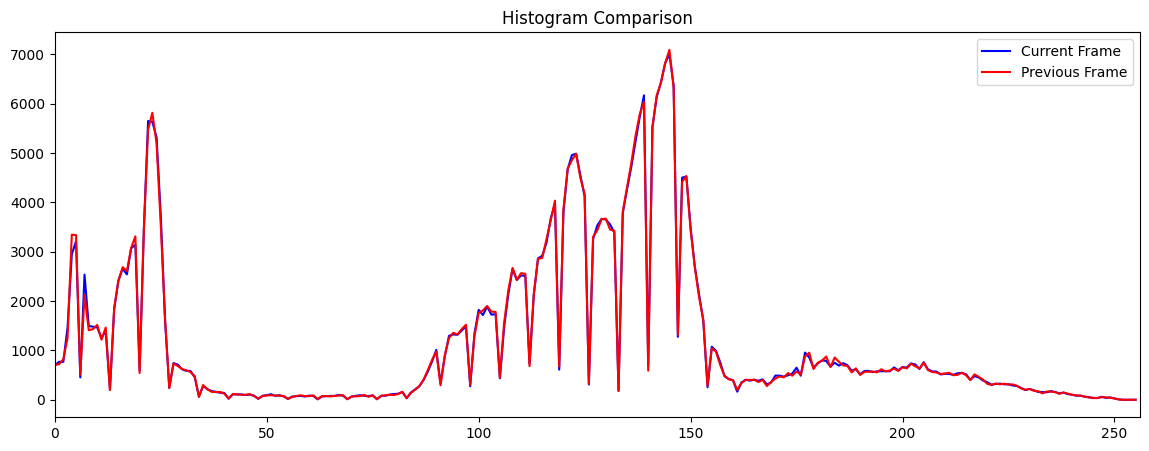

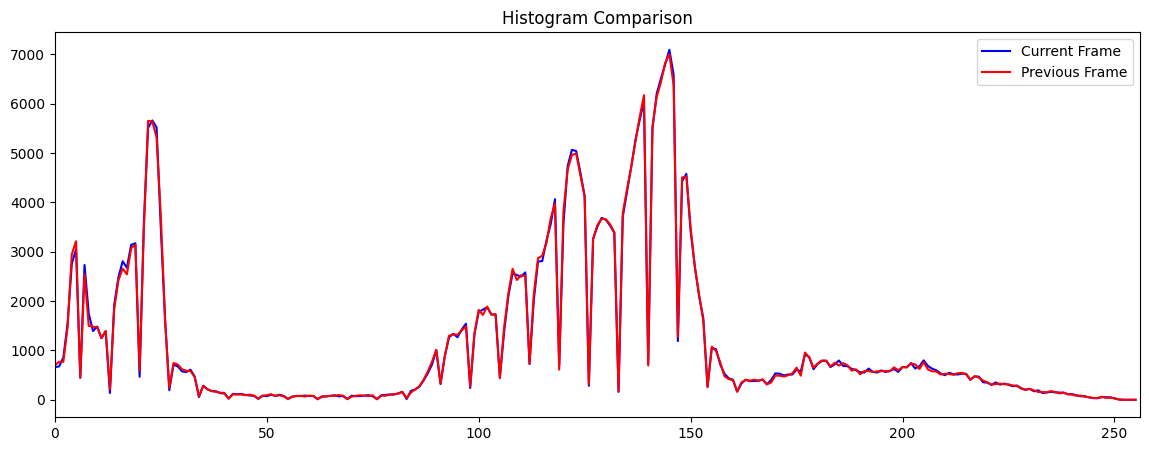

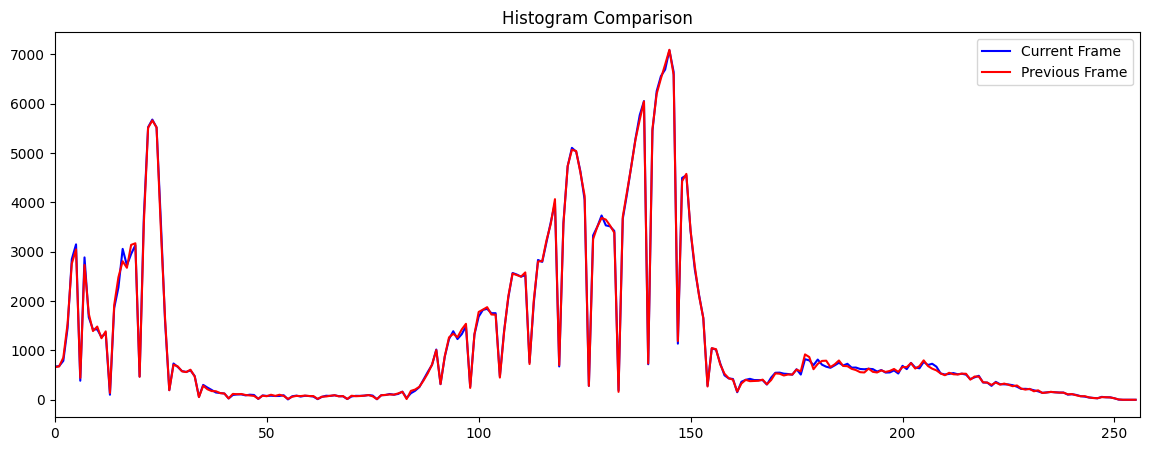

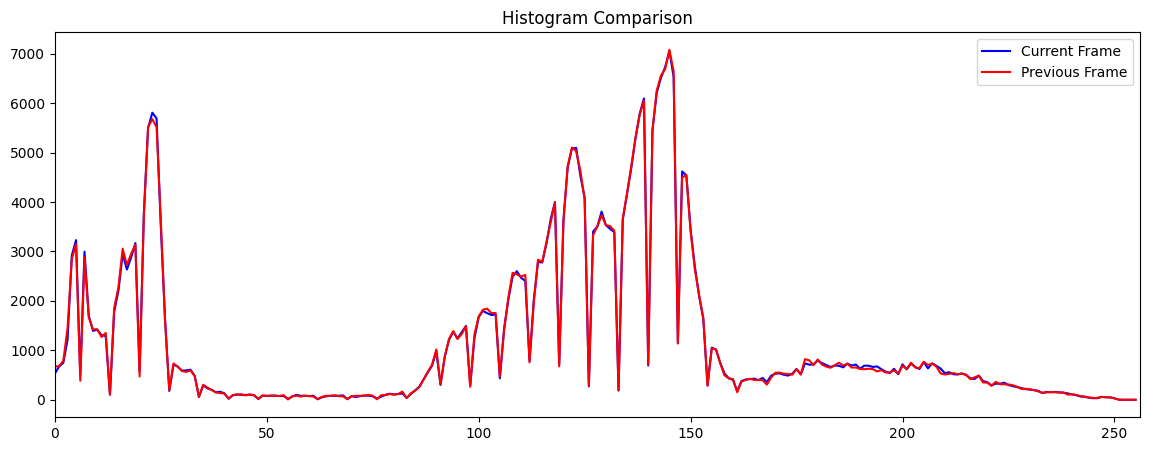

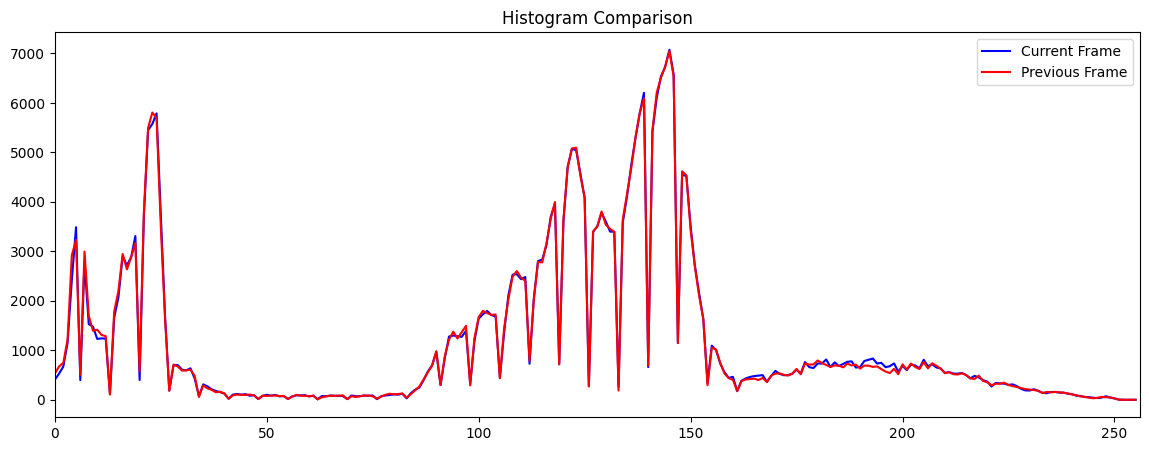

In [14]:
HDiffs = calculate_histogram_differences(gray_frames)

HDiffs = []

# Duyệt qua tất cả các frame trừ frame cuối vì thường là frame không có giá trị
for i in range(0, len(gray_frames)-1):
    if (i == 0):
    #[gray_frames[i]]: grayframe thứ i, [0] kênh chứa độ sáng, None: tính toàn bộ ảnh, không dùng mask, [256]: 256 bins, 0 <=[0, 256]: giá trị pixel < 256
        hist_curr = cv2.calcHist([gray_frames[i]], [0], None, [256], [0, 256])
        continue
    # Gán frame ở vòng lặp trước cho hist_prev và tính lại hist_curr
    hist_prev = hist_curr
    hist_curr = cv2.calcHist([gray_frames[i]], [0], None, [256], [0, 256])

    Hdiff = np.sum(np.abs(hist_prev - hist_curr))
    HDiffs.append(Hdiff)

    # Trực quan 2 Histogram liên tiếp để kiểm tra
    if (15 < i <= 20):
        plt.figure(figsize=(14, 5))
        plt.title("Histogram Comparison")
        plt.plot(hist_curr, color='blue', label='Current Frame')
        plt.plot(hist_prev, color='red', label='Previous Frame')
        plt.xlim([0, 256])
        plt.legend()
        plt.show()

<h3> Tính trung bình và độ lệch chuẩn của mảng Hdiffs và tính ngưỡng Threshold

In [15]:
mean = np.mean(HDiffs)
std = np.std(HDiffs)
threshold = mean + std
print (f"Giá trị trung bình của HDiffs: {mean}")
print (f"Độ lệch chuẩn của HDiffs: {std}")
print (f"Ngưỡng threshold: {threshold}")

Giá trị trung bình của HDiffs: 13535.0888671875
Độ lệch chuẩn của HDiffs: 8090.55029296875
Ngưỡng threshold: 21625.638671875


<h3> Trực quan ngưỡng Threshold

Histogram threshold: 21625.638671875


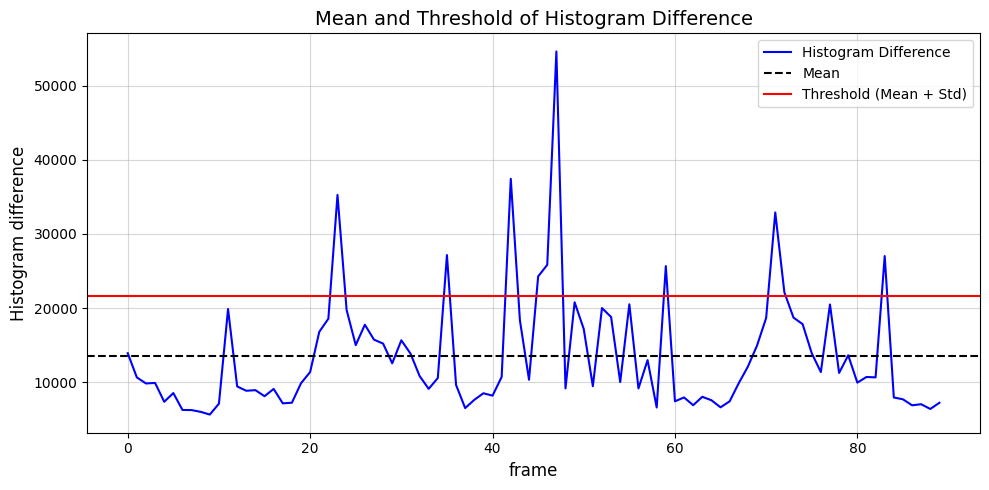

In [16]:
print(f"Histogram threshold: {threshold}")

# Vẽ đồ thị
plt.figure(figsize=(10, 5))
plt.title("Mean and Threshold of Histogram Difference", fontsize=14)
plt.plot(HDiffs, color="blue", label="Histogram Difference")  
plt.axhline(y=mean, color="black", linestyle="--", label="Mean")  
plt.axhline(y=threshold, color="red", linestyle="-", label="Threshold (Mean + Std)")  
plt.xlabel("frame", fontsize=12)
plt.ylabel("Histogram difference", fontsize=12)
plt.legend(fontsize=10) 
plt.grid(alpha=0.5) 
plt.tight_layout()  
plt.show()

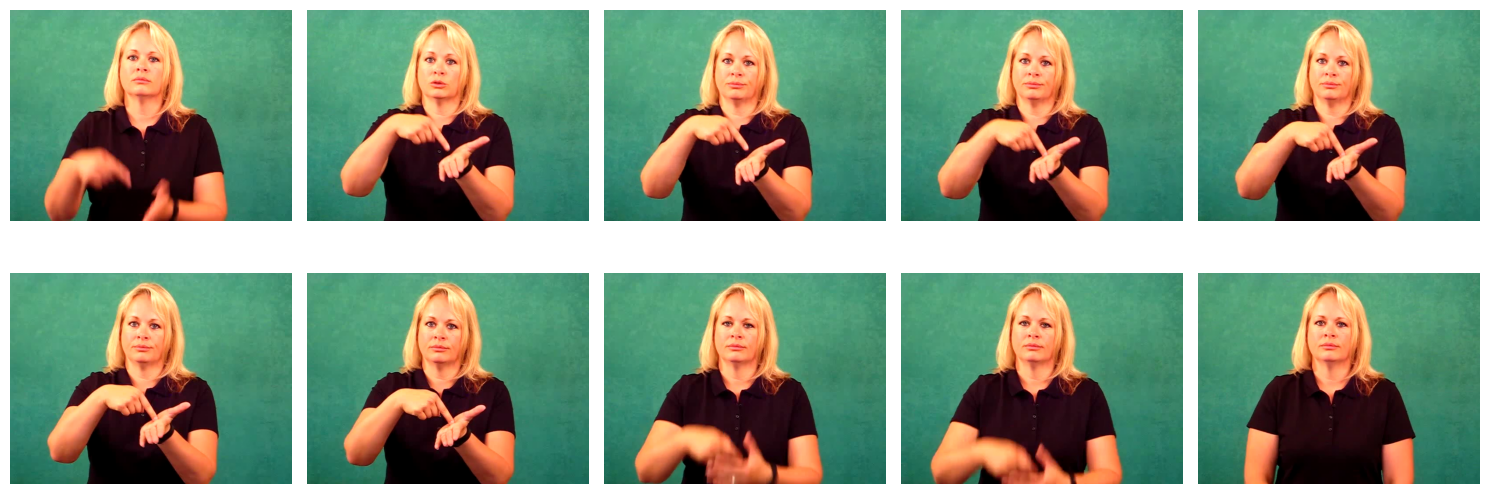

In [17]:
keyframes = []

for i in range(len(HDiffs)):
    if HDiffs[i] > threshold:
        # Lấy frame i+1 vì Hdiffs[i] là độ khác biệt của frame thứ i +1 với thứ i
        keyframes.append(frames[i+1])



# Hiển thị các keyframes
num_frames = len(keyframes)
grid_cols = 5  
grid_rows = np.ceil(num_frames / grid_cols).astype(int)  # Tính số hàng cần thiết

plt.figure(figsize=(15, grid_rows * 3)) 
for i, rgb_frame in enumerate(keyframes):
    plt.subplot(grid_rows, grid_cols, i + 1)  # Xác định vị trí trong grid
    frame_rgb = cv2.cvtColor(rgb_frame, cv2.COLOR_BGR2RGB)  # Chuyển đổi BGR sang RGB
    plt.imshow(frame_rgb)
    plt.axis('off')

plt.tight_layout()
plt.show()

<h3> Lưu lại các keyframes

In [18]:
path_folder = rf"D:\Study_space\Ki6\sign_language_recognition_project\debug\keyframes\keyframes_{namevideo}"
if not os.path.exists(path_folder):
    os.makedirs(path_folder)
for idx, rgb_frame in enumerate(keyframes):
    frame_path = os.path.join(path_folder , f"key_frame_{idx}.jpg")
    cv2.imwrite(frame_path, rgb_frame)

# Trích xuất landmarks với mediapipe

## Khai báo các hàm 

<h3> Hàm trích xuất các landmarks pose </h3>



<i> Với các landmarks: mũi[0], mắt trái (trong)[1], mắt trái[2], mắt trái (ngoài)[3], mắt phải (trong)[4], mắt phải[5], mắt phải (ngoài)[6], miệng (trái)[9], miệng (phải)[10], vai trái[11], vai phải[12], khuỷu tay trái[13], khuỷu tay phải[14], cổ tay trái[15], cổ tay phải[16]


In [19]:
def extract_pose_landmarks(rgb_frame, mp_pose):
    pose_results = mp_pose.process(rgb_frame)
    pose_landmarks = []

    if pose_results.pose_landmarks:
        for i, lm in enumerate(pose_results.pose_landmarks.landmark):
            if i < 17 and i not in [7, 8]:  # Loại bỏ từ hông trở xuống và 2 tai
                pose_landmarks.append((lm.x, lm.y))
    return pose_landmarks

<h3> Hàm xác định tay trái phải thay cho mediapipe hand </h3>

Tính khoảng cách Euclidean từ cổ tay của landmarks tay đến 2 landmark cổ tay từ mediapose, nếu gần bên nào hơn thì là tay bên đó

In [20]:
# def euclidean_distance(x1, y1, x2, y2):
#     return np.sqrt((float(x1) - float(x2)) ** 2 + (float(y1) - float(y2)) ** 2)


def classify_hands (pose_landmarks, hand_landmarks):
    left_wrist_pose  = pose_landmarks[13]  # Cổ tay trái từ Pose là 15 trừ đi 2 tai đã lượt bỏ nên idx = 13
    right_wrist_pose = pose_landmarks[14]  # Cổ tay phải từ Pose là 16 trừ đi 2 tai đã lượt bỏ nên idx = 14
    wrist = hand_landmarks[0] 
    

    dleft = euclidean_distance(left_wrist_pose, wrist)
    dright = euclidean_distance(right_wrist_pose, wrist)
    # dleft = euclidean_distance(wrist_x, wrist_y, left_wrist_pose[0], left_wrist_pose[1])
    # dright = euclidean_distance(wrist_x, wrist_y, right_wrist_pose[0], right_wrist_pose[1])
   
    if(dleft < dright):
        return "Left"
    else:
        return "Right"



<h3> Hàm trích xuất landmarks 2 tay </h3>

<i>cổ tay[0], gốc ngón cái[1], khớp ngón cái[2], đốt ngón cái[3], đầu ngón cái[4], khớp ngón trỏ[5], đốt ngón trỏ[6], đầu ngón trỏ[7], đầu ngón trỏ[8], khớp ngón giữa[9], đốt ngón giữa[10], đầu ngón giữa[11], đầu ngón giữa[12], khớp ngón áp út[13], đốt ngón áp út[14], đầu ngón áp út[15], đầu ngón út[16], khớp ngón út[17], đốt ngón út[18], đầu ngón út[19], đầu ngón út[20]


In [21]:
#Cần kiểm tra lại xem video có đúng chiều với thực tế hay không

def extract_hand_landmarks(rgb_frame, mp_hands, pose_landmarks):
    hands_results = mp_hands.process(rgb_frame)
    left_hand_landmarks = []
    right_hand_landmarks = []
    prev_label = ""
    
    if hands_results.multi_hand_landmarks and hands_results.multi_handedness:
        for hand_landmarks, handedness in zip(hands_results.multi_hand_landmarks, hands_results.multi_handedness):
            # Không sử dụng hướng tay của mediapipe vì độ chính xác thấp và thường ngược hướng
            landmarks = [(lm.x, lm.y) for lm in hand_landmarks.landmark]
            if classify_hands(pose_landmarks, landmarks) == "Right":
                right_hand_landmarks = landmarks
            else:
                left_hand_landmarks = landmarks                
            # elif label == "Left":
            #     left_hand_landmarks = landmarks
            # elif label == "Right":
            #     right_hand_landmarks = landmarks


    
    return left_hand_landmarks, right_hand_landmarks

<h3> Hàm trích xuất landmarks 


In [22]:
def extract_landmarks(frames):
    mp_pose = mp.solutions.pose.Pose(static_image_mode=True)
    mp_hands = mp.solutions.hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.1)
    
    landmarks_dict = {}
    
    for idx, frame in enumerate(frames):
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        pose_landmarks = extract_pose_landmarks(rgb_frame, mp_pose)
        left_hand_landmarks, right_hand_landmarks = extract_hand_landmarks(rgb_frame, mp_hands ,pose_landmarks)
        
        landmarks_dict[idx] = {
            "pose": pose_landmarks,
            "left": left_hand_landmarks,
            "right": right_hand_landmarks
        }
    #giải phóng tài nguyên
    mp_pose.close()
    mp_hands.close()
    return landmarks_dict

<h3> Hàm xuất ảnh đã gán landmarks cho kiểm thử

In [23]:
CUSTOM_POSE_CONNECTIONS = [
    (0, 1), (0, 4),         # mũi - 2 mắt 
    (4, 5), (5, 6),         # mắt phải
    (1, 2), (2, 3),         # mắt trái
    # vì bỏ 2 tai nên mỗi landmarks phía sau giảm index đi 2
    (7, 8),                # miệng
    (9, 10),               # 2 vai
    (10, 12), (12, 14),     # tay phải
    (9, 11), (11, 13),     # tay trái
]

def draw_landmarks(frame, landmarks_dict):
    h, w, _ = frame.shape  
    annotated_frame = frame.copy()

    pose_landmarks = landmarks_dict.get("pose", [])
    left_hand_landmarks = landmarks_dict.get("left", [])
    right_hand_landmarks = landmarks_dict.get("right", [])

    # Vẽ đường nối Pose (sử dụng kết nối tùy chỉnh)
    if pose_landmarks and len(pose_landmarks) > 0:
        for idx1, idx2 in CUSTOM_POSE_CONNECTIONS:
            if idx1 < len(pose_landmarks) and idx2 < len(pose_landmarks):
                x1, y1 = pose_landmarks[idx1]
                x2, y2 = pose_landmarks[idx2]
                if x1 and y1 and x2 and y2:
                    x1, y1 = int(x1 * w), int(y1 * h)
                    x2, y2 = int(x2 * w), int(y2 * h)
                    cv2.line(annotated_frame, (x1, y1), (x2, y2), (0, 255, 0), 5)

    # Vẽ đường nối Tay trái/phải
    mp_hands = mp.solutions.hands
    hand_connections = list(mp_hands.HAND_CONNECTIONS)

    for hand, landmarks, color in [("left", left_hand_landmarks, (255, 0, 0)), ("right", right_hand_landmarks, (0, 0, 255))]:
        if landmarks and len(landmarks) > 0:
            for idx1, idx2 in hand_connections:
                if idx1 < len(landmarks) and idx2 < len(landmarks):
                    x1, y1 = landmarks[idx1]
                    x2, y2 = landmarks[idx2]
                    if x1 and y1 and x2 and y2:
                        x1, y1 = int(x1 * w), int(y1 * h)
                        x2, y2 = int(x2 * w), int(y2 * h)
                        cv2.line(annotated_frame, (x1, y1), (x2, y2), color, 2)

    # Vẽ các điểm landmarks
    for part, landmarks, color in zip(["pose", "left", "right"], 
                                      [pose_landmarks, left_hand_landmarks, right_hand_landmarks], 
                                      [(0, 255, 0), (255, 0, 0), (0, 0, 255)]):
        if landmarks and len(landmarks) > 0:
            for x, y in landmarks:
                if x and y:
                    x, y = int(x * w), int(y * h)
                    cv2.circle(annotated_frame, (x, y), 5, color, -1)

    return annotated_frame


## Kiểm thử

In [ ]:
namevideo = "17960"
video_path = rf'D:\Study_space\Ki6\sign_language_recognition_project\data\raw\videos\{namevideo}.mp4' 

# Trích xuất keyframes từ video
keyframes = Extract_key_frames(video_path)

# Trích xuất landmarks từ keyframes
landmarks = extract_landmarks(keyframes)


Video has 92 frames at 30.003261224046092 FPS


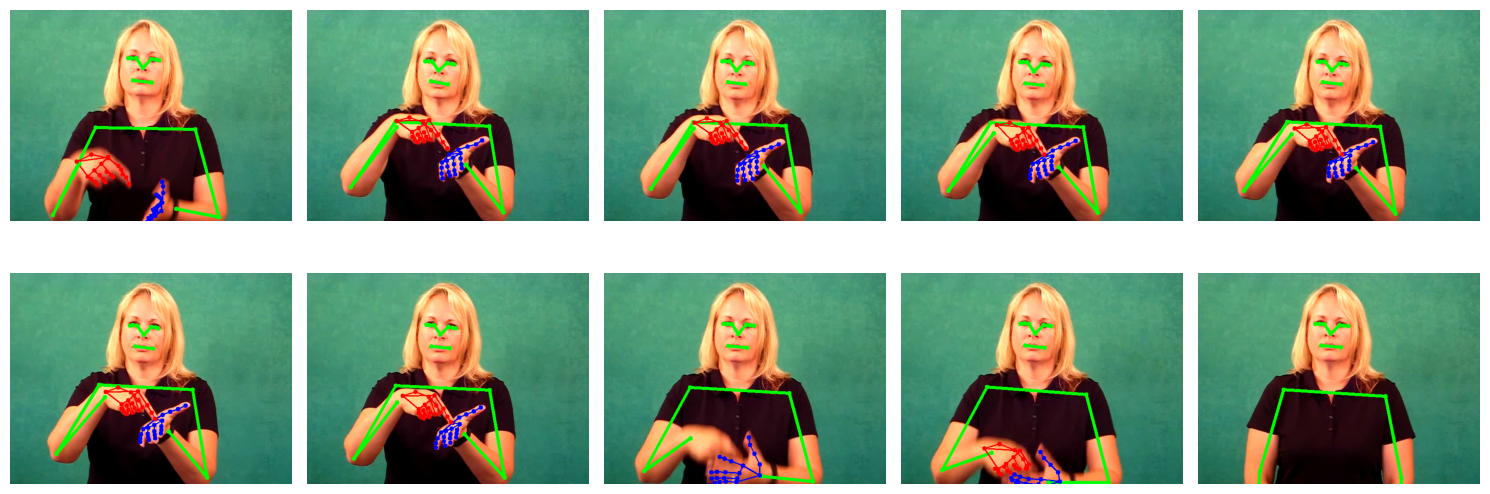

In [ ]:
#vẽ các landmarks lên keyframes để kiểm tra
annotated_frames = []
for idx, landmarks_dictIdx in landmarks.items():
    annotated_frame = draw_landmarks(keyframes[idx], landmarks_dictIdx)  
    annotated_frames.append(annotated_frame)


num_frames = len(annotated_frames)
grid_cols = 5  
grid_rows = np.ceil(num_frames / grid_cols).astype(int)  # Tính số hàng cần thiết

plt.figure(figsize=(15, grid_rows * 3)) 
for i, rgb_frame in enumerate(annotated_frames):
    plt.subplot(grid_rows, grid_cols, i + 1)  # Xác định vị trí trong grid
    frame_rgb = cv2.cvtColor(rgb_frame, cv2.COLOR_BGR2RGB)  # Chuyển đổi BGR sang RGB
    plt.imshow(frame_rgb)
    plt.axis('off')

plt.tight_layout()
plt.show()

<h3>Lưu lại các ảnh đã gắn landmarks

In [26]:
path_folder = rf"D:\Study_space\Ki6\sign_language_recognition_project\debug\annotateds\annotateds_{namevideo}"
if not os.path.exists(path_folder):
    os.makedirs(path_folder)
for idx, rgb_frame in enumerate(annotated_frames):
    frame_path = os.path.join(path_folder , f"annotated_frame_{idx}.jpg")
    cv2.imwrite(frame_path, rgb_frame)

# Tăng cường dữ liệu

## Khai báo các hàm 

<h3> Hàm xoay landmarks </h3>

Xoay tọa độ điểm quanh tâm (0.5, 0.5) theo góc angle_deg (độ).

Công thức:

* x' = (x - 0.5)*cos(q) - (y - 0.5)*sin(q) + 0.5 

* y' = (x - 0.5)*sin(q) + (y - 0.5)*cos(q) + 0.5

In [43]:
def rotate_landmarks(landmarks, angle_deg, center):
    transformed = {}
    theta = np.radians(angle_deg)
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)
    cx, cy = center
    
    for key in landmarks:
        if landmarks[key]:
            points = np.array(landmarks[key], dtype=np.float32)
            transformed_points = []
            for x, y in points:
                x_new = cx + (x - cx) * cos_theta - (y - cy) * sin_theta
                y_new = cy + (x - cx) * sin_theta + (y - cy) * cos_theta
                transformed_points.append([x_new, y_new])
            transformed[key] = transformed_points
        else:
            transformed[key] = []
    return transformed

<h3> Hàm dịch chuyển </h3>

Dịch landmarks theo tx,ty

In [44]:
def translate_landmarks(landmarks, tx, ty):
    transformed = {}
    for key in landmarks:
        if landmarks[key]:
            points = np.array(landmarks[key], dtype=np.float32)
            transformed_points = []
            for x, y in points:
                x_new = x + tx
                y_new = y + ty
                transformed_points.append([x_new, y_new])
            transformed[key] = transformed_points
        else:
            transformed[key] = []
    return transformed

<h3> Hàm thêm nhiễu </h3>

Cộng thêm 1 noise ngẫu nhiên vào cả landmarks

In [45]:
def add_noise_to_landmarks(landmarks, noise_level):
    noisy = {}
    for key in landmarks:
        if landmarks[key]:
            points = np.array(landmarks[key], dtype=np.float32)
            noise = np.random.uniform(-noise_level, noise_level, points.shape)
            noisy_points = points + noise
            noisy[key] = noisy_points.tolist()
        else:
            noisy[key] = []
    return noisy

<h3> Hàm squeeze</h3>

Thay đổi landmarks bằng cách nhân với tỉ lệ ngẫu nhiên cho 2 trục x,y và <15%

Debug:
Thấy chỉ thay đổi frame chứ không thay đổi pixel nên loại bỏ

In [ ]:
# def squeeze_frame_and_landmarks(frame, landmarks):
#     squeeze_x = np.random.uniform(0.85, 1.15)
#     squeeze_y = np.random.uniform(0.85, 1.15)
    
#     h, w = frame.shape[:2]
#     new_w = int(w * squeeze_x)
#     new_h = int(h * squeeze_y)
#     frame_squeezed = cv2.resize(frame, (new_w, new_h), interpolation=cv2.INTER_LINEAR)
    
#     transformed = {}
#     for key in landmarks:
#         if landmarks[key]:
#             points = np.array(landmarks[key], dtype=np.float32) * [w, h]
#             squeezed_points = points * [squeeze_x, squeeze_y]
#             transformed[key] = (squeezed_points / [new_w, new_h]).tolist()
#         else:
#             transformed[key] = []
    
#     return frame_squeezed, transformed

<h3> Hàm chiếu phối cảnh</h3>

Thực hiện biến đổi phối cảnh ngẫu nhiên lên một ảnh và các điểm landmarks

In [67]:

def perspective_transform(frame, landmarks):
    h, w = frame.shape[:2]

    pts1 = np.float32([[0, 0], [w, 0], [w, h], [0, h]])
    pts2 = np.float32([
        [np.random.uniform(-0.1, 0.1) * w, np.random.uniform(-0.1, 0.1) * h],
        [w + np.random.uniform(-0.1, 0.1) * w, np.random.uniform(-0.1, 0.1) * h],
        [w + np.random.uniform(-0.1, 0.1) * w, h + np.random.uniform(-0.1, 0.1) * h],
        [np.random.uniform(-0.1, 0.1) * w, h + np.random.uniform(-0.1, 0.1) * h]
    ])

    # Tính toán ma trận biến đổi
    M = cv2.getPerspectiveTransform(pts1, pts2)

    # Áp dụng biến đổi phối cảnh lên frame
    frame_persp = cv2.warpPerspective(frame, M, (w, h))

    # Biến đổi landmarks
    transformed = {}
    for key in landmarks:
        if landmarks[key]:
            points = np.array(landmarks[key], dtype=np.float32) * [w, h]
            transformed_points = cv2.perspectiveTransform(points.reshape(-1, 1, 2), M).reshape(-1, 2).tolist()
            transformed[key] = (np.array(transformed_points) / [w, h]).tolist()
        else:
            transformed[key] = []

    return frame_persp, transformed

<h3> Hàm gọi tất cả phép tăng cường

In [76]:
def augment_data(keyframes, landmarks_dict):
    
    rotated_landmarks_dict = {}
    angle = np.random.uniform(-15, 15)
    center = (0.5,0.5)
    
    translated_landmarks_dict = {}
    dx, dy = np.random.uniform(-0.05, 0.05, 2)
    
    added_noise_landmarks_dict = {}
    noise_level = 0.01

    perspectived_landmarks_dict = {}

    for idx, landmarks_dictIdx in landmarks_dict.items():
        rotated_landmarks_dict[idx] = rotate_landmarks(landmarks_dictIdx, angle, center)
        translated_landmarks_dict[idx] = translate_landmarks(landmarks_dictIdx, dx , dy)
        added_noise_landmarks_dict[idx] = add_noise_to_landmarks(landmarks_dictIdx, noise_level)
        perspectived_keyframe, perspectived_landmarks_dict[idx] = perspective_transform(keyframes[idx],landmarks_dictIdx)
    return rotated_landmarks_dict, translated_landmarks_dict, added_noise_landmarks_dict, perspectived_landmarks_dict


## Kiểm thử


Lấy keyframes và landmarks

In [49]:
namevideo = "17960"
video_path = rf'{RAW_DATA_DIR}\videos\{namevideo}.mp4' 

# Trích xuất keyframes từ video
keyframes = Extract_key_frames(video_path)

# Trích xuất landmarks từ keyframes
landmarks_dict = extract_landmarks(keyframes)

Video has 92 frames at 30.003261224046092 FPS


Kiểm thử xoay

In [ ]:
augmented_landmarks_dict = {}
angle = np.random.uniform(-15, 15)
print(angle)
center = (0.5,0.5)
for idx, landmarks_dictIdx in landmarks_dict.items():
    augmented_landmarks_dict[idx] = rotate_landmarks(landmarks_dictIdx, angle, center)
    

#vẽ các landmarks lên keyframes để kiểm tra
annotated_frames = []
for idx, augmented_landmarks in augmented_landmarks_dict.items(): 
    annotated_frame = draw_landmarks(keyframes[idx], augmented_landmarks)  
    annotated_frames.append(annotated_frame)


num_frames = len(annotated_frames)
grid_cols = 5  
grid_rows = np.ceil(num_frames / grid_cols).astype(int)  # Tính số hàng cần thiết

plt.figure(figsize=(15, grid_rows * 3)) 
for i, rgb_frame in enumerate(annotated_frames):
    plt.subplot(grid_rows, grid_cols, i + 1)  # Xác định vị trí trong grid
    frame_rgb = cv2.cvtColor(rgb_frame, cv2.COLOR_BGR2RGB)  # Chuyển đổi BGR sang RGB
    plt.imshow(frame_rgb)
    plt.axis('off')

plt.tight_layout()

plt.show()

Kiểm thử dịch chuyển

-0.022042618688011908 0.012341995912101132


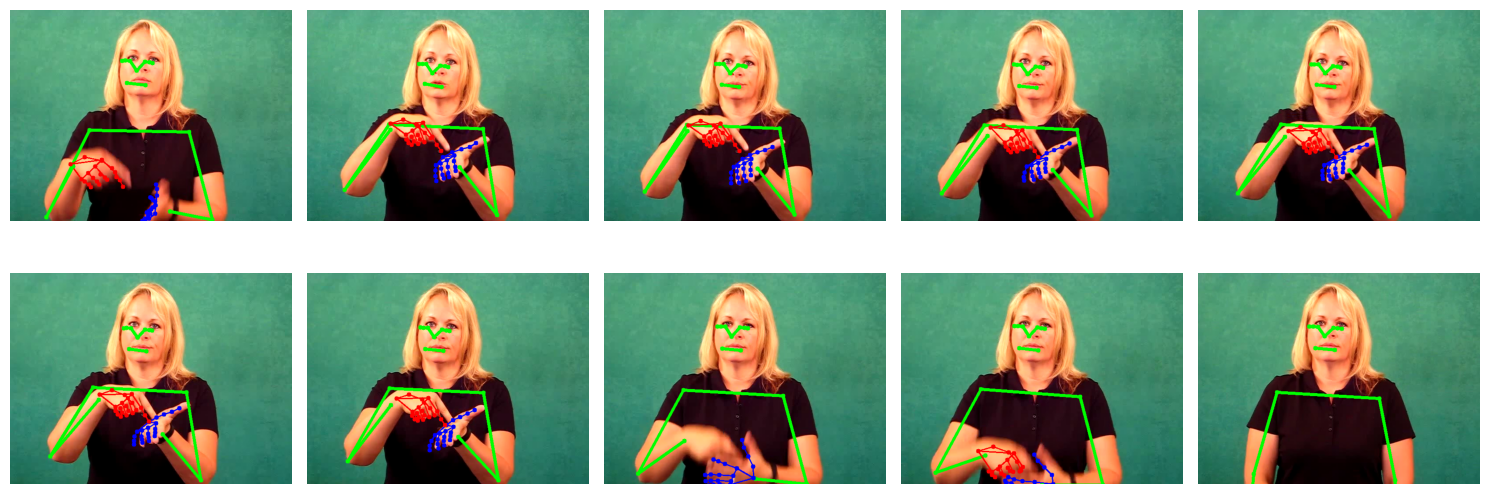

In [58]:
augmented_landmarks_dict = {}
dx, dy = np.random.uniform(-0.05, 0.05, 2)
print(dx,dy)
for idx, landmarks_dictIdx in landmarks_dict.items():
    augmented_landmarks_dict[idx] = translate_landmarks(landmarks_dictIdx, dx , dy)
    

#vẽ các landmarks lên keyframes để kiểm tra
annotated_frames = []
for idx, augmented_landmarks in augmented_landmarks_dict.items(): 
    annotated_frame = draw_landmarks(keyframes[idx], augmented_landmarks)  
    annotated_frames.append(annotated_frame)


num_frames = len(annotated_frames)
grid_cols = 5  
grid_rows = np.ceil(num_frames / grid_cols).astype(int)  # Tính số hàng cần thiết

plt.figure(figsize=(15, grid_rows * 3)) 
for i, rgb_frame in enumerate(annotated_frames):
    plt.subplot(grid_rows, grid_cols, i + 1)  # Xác định vị trí trong grid
    frame_rgb = cv2.cvtColor(rgb_frame, cv2.COLOR_BGR2RGB)  # Chuyển đổi BGR sang RGB
    plt.imshow(frame_rgb)
    plt.axis('off')

plt.tight_layout()
plt.show()

Kiểm thử thêm nhiễu

-0.022042618688011908 0.012341995912101132


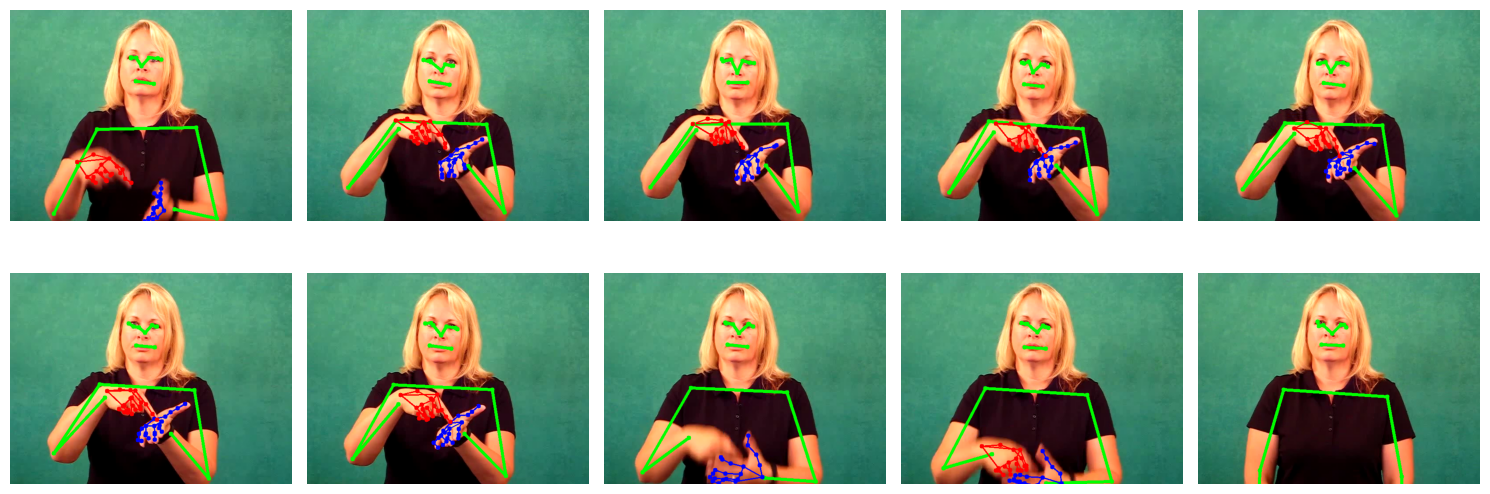

In [63]:
augmented_landmarks_dict = {}
noise_level = 0.01
print(dx,dy)
for idx, landmarks_dictIdx in landmarks_dict.items():
    augmented_landmarks_dict[idx] = add_noise_to_landmarks(landmarks_dictIdx, noise_level)
    

#vẽ các landmarks lên keyframes để kiểm tra
annotated_frames = []
for idx, augmented_landmarks in augmented_landmarks_dict.items(): 
    annotated_frame = draw_landmarks(keyframes[idx], augmented_landmarks)  
    annotated_frames.append(annotated_frame)


num_frames = len(annotated_frames)
grid_cols = 5  
grid_rows = np.ceil(num_frames / grid_cols).astype(int)  # Tính số hàng cần thiết

plt.figure(figsize=(15, grid_rows * 3)) 
for i, rgb_frame in enumerate(annotated_frames):
    plt.subplot(grid_rows, grid_cols, i + 1)  # Xác định vị trí trong grid
    frame_rgb = cv2.cvtColor(rgb_frame, cv2.COLOR_BGR2RGB)  # Chuyển đổi BGR sang RGB
    plt.imshow(frame_rgb)
    plt.axis('off')

plt.tight_layout()
plt.show()

### Kiểm thử phép chiếu phối cảnh


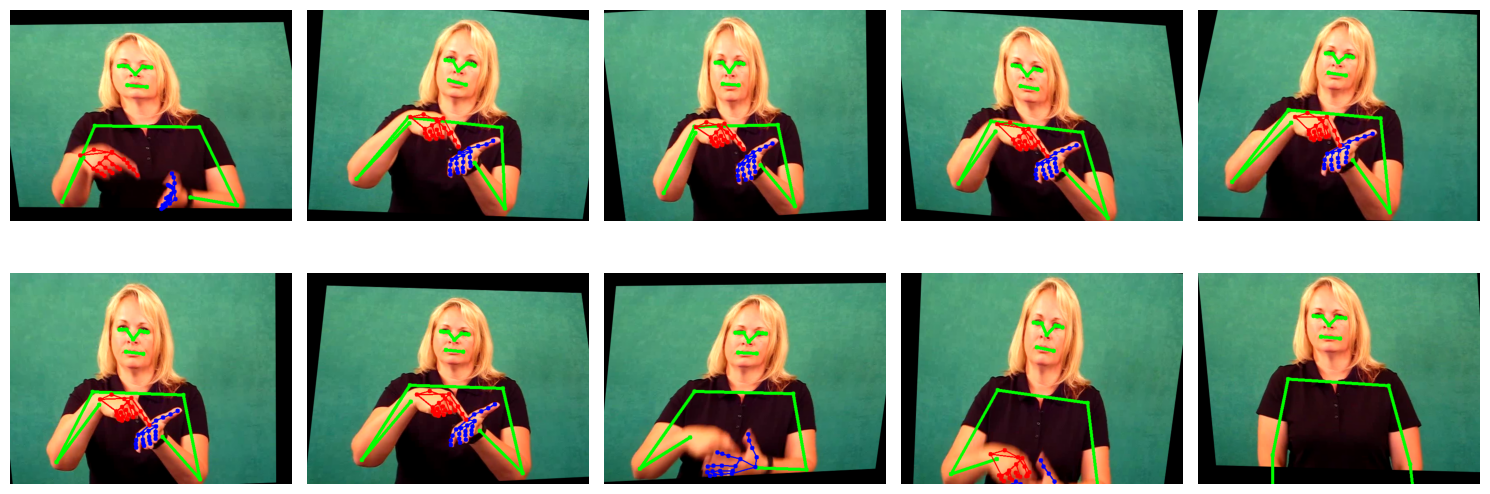

In [68]:
augmented_keyframes = []
augmented_landmarks_dict = {}
angle = np.random.uniform(-15, 15)
for idx, landmarks_dictIdx in landmarks_dict.items():
    augmented_keyframe, augmented_landmarks_dict[idx] = perspective_transform(keyframes[idx],landmarks_dictIdx)
    augmented_keyframes.append(augmented_keyframe)
#vẽ các landmarks lên keyframes để kiểm tra
annotated_frames = []
for idx, augmented_landmarks in augmented_landmarks_dict.items(): 
    annotated_frame = draw_landmarks(augmented_keyframes[idx], augmented_landmarks)  
    annotated_frames.append(annotated_frame)


num_frames = len(annotated_frames)
grid_cols = 5  
grid_rows = np.ceil(num_frames / grid_cols).astype(int)  # Tính số hàng cần thiết

plt.figure(figsize=(15, grid_rows * 3)) 
for i, rgb_frame in enumerate(annotated_frames):
    plt.subplot(grid_rows, grid_cols, i + 1)  # Xác định vị trí trong grid
    frame_rgb = cv2.cvtColor(rgb_frame, cv2.COLOR_BGR2RGB)  # Chuyển đổi BGR sang RGB
    plt.imshow(frame_rgb)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Tiền xử lí các dữ liệu

In [82]:
import json


Chia tập dữ liệu thành 3 file và sắp xếp theo thứ tự gloss để dữ xử lí

In [81]:
# Đọc dữ liệu từ file JSON gốc
with open("../data/raw/dataset/nslt_100.json", "r") as f:
    dataset = json.load(f)

# Khởi tạo dictionary cho 3 tập dữ liệu
split_data = {"train": {}, "val": {}, "test": {}}

# Duyệt qua từng video trong dataset
for video_id, info in dataset.items():
    subset = info["subset"]  # train, val, test
    gloss_id = str(info["action"][0])  # Lấy action ID (gloss ID)

    # Nếu gloss ID chưa có trong tập tương ứng, khởi tạo danh sách rỗng
    if gloss_id not in split_data[subset]:
        split_data[subset][gloss_id] = []

    # Thêm video vào danh sách tương ứng
    split_data[subset][gloss_id].append(video_id)

# Sắp xếp dữ liệu trước khi lưu
for subset in ["train", "val", "test"]:
    # Sắp xếp video ID trong từng action ID
    for gloss_id in split_data[subset]:
        split_data[subset][gloss_id].sort()

    # Sắp xếp action ID theo thứ tự tăng dần
    split_data[subset] = dict(sorted(split_data[subset].items(), key=lambda x: int(x[0])))

    # Lưu kết quả vào file JSON
    filename = f"{RAW_DATA_DIR}/dataset/wasl100/{subset}_100.json"
    with open(filename, "w") as f:
        json.dump(split_data[subset], f, indent=4)

print("✅ Dữ liệu đã được phân chia, sắp xếp và lưu thành công!")


✅ Dữ liệu đã được phân chia, sắp xếp và lưu thành công!


Xử lí dữ liệu train

In [ ]:
OUTPUT_JSON_PATH = f"{PROCESSED_DATA_DIR}/wasl100_landmarks.json"

# Đọc dữ liệu từ train.json
with open(f"{RAW_DATA_DIR}/dataset/wasl100/train_100_train.json", "r") as f:
    train_data = json.load(f)

# Dictionary để lưu kết quả landmarks sau khi xử lý
processed_data = {}
# Duyệt qua từng gloss ID trong tập train
for gloss_id, video_list in train_data.items():
    processed_data[gloss_id] = []  # Thay vì dictionary, ta dùng list để bỏ video_id

    # Duyệt qua từng video trong gloss ID
    for video_id in video_list:
        print(f"🔄 Processing video: {video_id} (Gloss: {gloss_id})")
        
        # Gọi hàm xử lý video
        try:
            keyframes = Extract_key_frames(video_path)
        except Exception as e:
            print(f"❌ Error processing video: {video_id} (Gloss: {gloss_id}) - {e}")
            with open("../debug/missing.txt", "a") as debug_file:
                debug_file.write(f"{video_id}\n")
            continue
        # Trích xuất landmarks từ keyframes
        landmarks_dict = extract_landmarks(keyframes)
        
        # Lưu kết quả vào list
        
        rotated_landmarks_dict, translated_landmarks_dict, added_noise_landmarks_dict, perspectived_landmarks_dict = augment_data(keyframes, landmarks_dict)
        for dict in [landmarks_dict, rotated_landmarks_dict, translated_landmarks_dict, added_noise_landmarks_dict, perspectived_landmarks_dict]:
            processed_data[gloss_id].append({
            "keyframes": len(keyframes),
            "landmarks": dict
            })
    # Lưu vào file JSON sau mỗi từ 
    with open(OUTPUT_JSON_PATH, "w") as f:
        json.dump(processed_data, f, indent=4)
print("✅ Tất cả video đã được xử lý và lưu thành công!")


🔄 Processing video: 07068 (Gloss: 0)
Video has 92 frames at 30.003261224046092 FPS
🔄 Processing video: 07069 (Gloss: 0)
Video has 92 frames at 30.003261224046092 FPS
🔄 Processing video: 07070 (Gloss: 0)
Video has 92 frames at 30.003261224046092 FPS
🔄 Processing video: 07071 (Gloss: 0)
Video has 92 frames at 30.003261224046092 FPS
🔄 Processing video: 07073 (Gloss: 0)
Video has 92 frames at 30.003261224046092 FPS
🔄 Processing video: 07074 (Gloss: 0)
Video has 92 frames at 30.003261224046092 FPS
🔄 Processing video: 07075 (Gloss: 0)
Video has 92 frames at 30.003261224046092 FPS
🔄 Processing video: 07076 (Gloss: 0)
Video has 92 frames at 30.003261224046092 FPS
🔄 Processing video: 07077 (Gloss: 0)
Video has 92 frames at 30.003261224046092 FPS
🔄 Processing video: 07078 (Gloss: 0)
Video has 92 frames at 30.003261224046092 FPS
🔄 Processing video: 07079 (Gloss: 0)
Video has 92 frames at 30.003261224046092 FPS
🔄 Processing video: 07080 (Gloss: 0)
Video has 92 frames at 30.003261224046092 FPS
🔄 Pr

Xử lí dữ liệu test

In [ ]:
OUTPUT_JSON_PATH = f"{PROCESSED_DATA_DIR}/wasl100_landmarks_test.json"

# Đọc dữ liệu từ train.json
with open(f"{RAW_DATA_DIR}/dataset/wasl100/test_100.json", "r") as f:
    train_data = json.load(f)

# Dictionary để lưu kết quả landmarks sau khi xử lý
processed_data = {}
# Duyệt qua từng gloss ID trong tập train
for gloss_id, video_list in train_data.items():
    processed_data[gloss_id] = []  # Thay vì dictionary, ta dùng list để bỏ video_id

    # Duyệt qua từng video trong gloss ID
    for video_id in video_list:
        print(f"🔄 Processing video: {video_id} (Gloss: {gloss_id})")
        
        # Gọi hàm xử lý video
        try:
            keyframes = Extract_key_frames(video_path)
        except Exception as e:
            print(f"❌ Error processing video: {video_id} (Gloss: {gloss_id}) - {e}")
            with open("../debug/missing.txt", "a") as debug_file:
                debug_file.write(f"{video_id}\n")
            continue
        # Trích xuất landmarks từ keyframes
        landmarks_dict = extract_landmarks(keyframes)
        
        # Lưu kết quả vào list
        
        processed_data[gloss_id].append({
            "keyframes": len(keyframes),
            "landmarks": dict
            })
    # Lưu vào file JSON sau mỗi từ 
    with open(OUTPUT_JSON_PATH, "w") as f:
        json.dump(processed_data, f, indent=None)
print("✅ Tất cả video đã được xử lý và lưu thành công!")

Xử lý dữ liệu val

In [ ]:
OUTPUT_JSON_PATH = f"{PROCESSED_DATA_DIR}/wasl100_landmarks_val.json"

# Đọc dữ liệu từ train.json
with open(f"{RAW_DATA_DIR}/dataset/wasl100/val_100.json", "r") as f:
    train_data = json.load(f)

# Dictionary để lưu kết quả landmarks sau khi xử lý
processed_data = {}
# Duyệt qua từng gloss ID trong tập train
for gloss_id, video_list in train_data.items():
    processed_data[gloss_id] = []  # Thay vì dictionary, ta dùng list để bỏ video_id

    # Duyệt qua từng video trong gloss ID
    for video_id in video_list:
        print(f"🔄 Processing video: {video_id} (Gloss: {gloss_id})")
        
        # Gọi hàm xử lý video
        try:
            keyframes = Extract_key_frames(video_path)
        except Exception as e:
            print(f"❌ Error processing video: {video_id} (Gloss: {gloss_id}) - {e}")
            with open("../debug/missing.txt", "a") as debug_file:
                debug_file.write(f"{video_id}\n")
            continue
        # Trích xuất landmarks từ keyframes
        landmarks_dict = extract_landmarks(keyframes)
        
        # Lưu kết quả vào list
        
        processed_data[gloss_id].append({
            "keyframes": len(keyframes),
            "landmarks": dict
            })
    # Lưu vào file JSON sau mỗi từ 
    with open(OUTPUT_JSON_PATH, "w") as f:
        json.dump(processed_data, f, indent=4)
print("✅ Tất cả video đã được xử lý và lưu thành công!")